In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# let's take a look of Airbnb boston dataset (listings)
df_listings = pd.read_csv('listings.csv')
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,9569407,Clean & Cozy Newton/Boston College,44920239,Marcia,NaN,Brighton,42.33588,-71.18811,Private room,60,91,13,2019-09-02,0.17,2,255,0,NaN
1,31650137,Cozy Queen Bedroom close to Boston,13005723,Anderson,NaN,Charlestown,42.40645,-71.05180,Private room,104,2,144,2022-06-02,3.60,3,85,57,NaN
2,6599485,Cambridge Harvard Comfortable Room,6438360,John,NaN,Allston,42.38461,-71.13500,Private room,63,30,210,2022-03-19,2.50,2,154,3,NaN
3,26703374,Harvard Square less than 2 miles,71156317,Eddy,NaN,Brighton,42.37511,-71.15229,Private room,87,3,21,2022-06-09,0.45,1,61,16,STR-16228
4,13883630,"Nice, Clean, Warm, Smoke Free 1 in East Somerv...",80080682,Maria And Jose,NaN,Charlestown,42.38751,-71.09151,Private room,90,2,128,2022-05-26,1.78,2,226,12,NaN


In [3]:
num_rows = df_listings.shape[0]
num_col = df_listings.shape[1]
print ("Number of columns :{} and rows:{} ".format(num_col, num_rows))

Number of columns :18 and rows:4903 


In [4]:
# Pandas series of the counts for each room type. W
room_type_serie = df_listings.room_type.value_counts()
print (room_type_serie)

Entire home/apt    3230
Private room       1622
Shared room          27
Hotel room           24
Name: room_type, dtype: int64


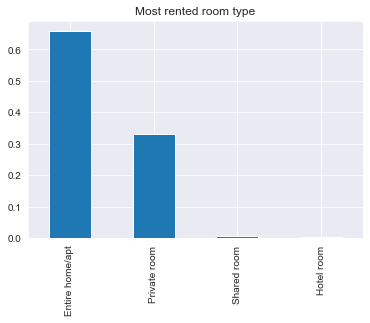

In [5]:
# The below should be a bar chart of the proportion of individuals in each room type category if your room_type_serie is set up correctly
(room_type_serie/df_listings.shape[0]).plot(kind="bar");
plt.title("Most rented room type");

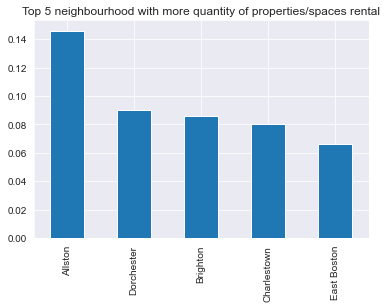

In [6]:
neighbourhood_serie = df_listings.neighbourhood.value_counts()

# The below should be a bar chart of the proportion of the top 5 neighbourhood for the individuals in your neighbourhood_serie if it is set up correctly.
(neighbourhood_serie[:5] / df_listings.shape[0]).plot(kind="bar");
plt.title("Top 5 neighbourhood with more quantity of properties/spaces rental");

In [7]:
# According to the neighbourhood and room type, which group has the highest average price? (where room_type will be the most rented (Entire home/apt or Privete Room) and the neighbourhood is in the top 5 (Allston, Dorchester, Brighton, Charlestown or  East Boston)
df_nhood_rt_price=pd.DataFrame(df_listings.query("(room_type == 'Entire home/apt' or room_type == 'Private room') and (neighbourhood == 'Allston' or neighbourhood == 'Dorchester' or neighbourhood == 'Brighton' or neighbourhood == 'Charlestown' or neighbourhood == 'East Boston') ").groupby(['neighbourhood', 'room_type']).mean()['price'])
print(df_nhood_rt_price)

                                    price
neighbourhood room_type                  
Allston       Entire home/apt  279.376884
              Private room     156.949206
Brighton      Entire home/apt  299.778226
              Private room      96.945455
Charlestown   Entire home/apt  271.333333
              Private room     102.848276
Dorchester    Entire home/apt  257.845494
              Private room     123.611650
East Boston   Entire home/apt  235.944186
              Private room      92.504854


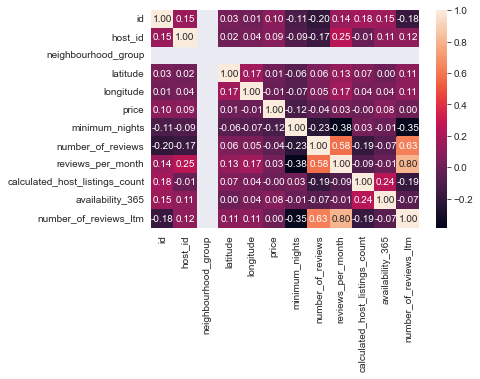

In [9]:
sns.heatmap(df_listings.corr(), annot=True, fmt=".2f");

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'neighbourhood_group'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'number_of_reviews_ltm'}>]],
      dtype=object)

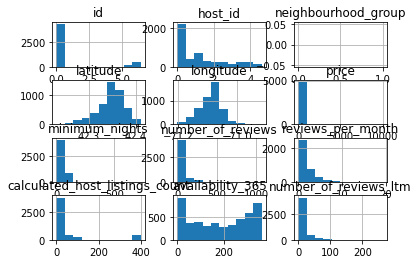

In [21]:
df_listings.hist()